# Exercise Numpy/Scipy

### 2. Solving ordinary differential equations (ODEs) using scipy

Consider the following hypothetical reaction system which was first proposed by Alfred J. Lotka (Lotka-Voltera System):
$$ \begin{align} 
r1:& \;\; X \rightarrow 2 X \\ 
r2:& \;\; X + Y \rightarrow 2 Y \\
r3:& \;\; Y \rightarrow \varnothing 
\end{align} $$

1. set up the stoichiometric matrix of the system (this can be done without Python)
2. the rate of change of the species participating in a reaction system can be written as
$$ \frac {dS} {dt} = N \cdot v(S,p) $$
with the vector of species concentrations $S$, the stoichiometric matrix N and the vector of reaction velocities $v(S,p)$ ($p$ denotes a vector of parmameters)
define a function `dSdt( S, t )` which computes the rate of change for each species, given the vector of current species concentrations $S$ and the current time $t$. Assume that all reactions follow irreversible mass-action kinetics with parameters $k_1 = 1.5$, $k_2 = 0.8 $ and $k_3 = 0.9$, each equal to 
3. Use the scipy ODE integrator scipy.integrate.odeint to solve the reaction system numerically on the time interval $t \in [0, 30]$ using the following initial conditions: $X(0)= Y(0) = 1$

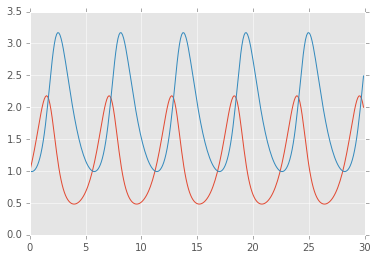

In [133]:
import numpy as np
import scipy as sp
import scipy.integrate
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

N = np.array( [[1, -1, 0], [0, 1, -1]])
k1 = 1.5
k2 = .8
k3 = 0.9

def dSdt( S, t):
    X, Y = S
    v = np.zeros(3)
    v[0] = k1*X
    v[1] = k2*X*Y
    v[2] = k3*Y
    return np.dot( N, v )

time = np.arange(0,30,.1)
S0 = np.array([1, 1] )

result = scipy.integrate.odeint( dSdt, S0, time  )
plt.plot( time, result )